# Fitting Models Exercise 2

## Imports

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [15]:
# YOUR CODE HERE
data = np.load('decay_osc.npz')
tdata = data['tdata']
ydata = data['ydata']
dy = data['dy']
data.close

<bound method NpzFile.close of <numpy.lib.npyio.NpzFile object at 0x7f98a459b198>>

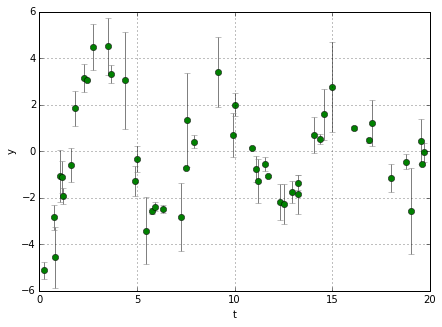

In [46]:
plt.figure(figsize=(7,5))
plt.errorbar(tdata, ydata, dy, fmt='og', ecolor='gray')
plt.xlabel('t')
plt.ylabel('y')
plt.grid();

In [ ]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [33]:
# YOUR CODE HERE
def model(t, a, lamb, omega, delta):
    y = a * np.exp(-lamb * t)*np.cos(omega*t) + delta
    return y

theta_best, theta_cov = opt.curve_fit(model, tdata, ydata, absolute_sigma=True)

In [40]:
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('lambda = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('omega = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[0,0])))
print('delta = {0:.3f} +/- {1:.3f}'.format(theta_best[3], np.sqrt(theta_cov[1,1])))

a = -5.285 +/- 0.520
lambda = 0.071 +/- 0.014
omega = -1.012 +/- 0.520
delta = 0.229 +/- 0.014


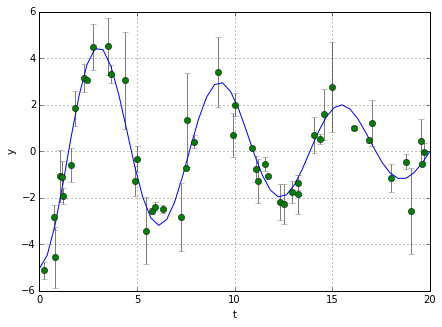

In [45]:
xfit = np.linspace(0,20)
yfit = model(xfit, theta_best[0], theta_best[1], theta_best[2], theta_best[3])

plt.figure(figsize=(7,5))
plt.plot(xfit, yfit)
plt.errorbar(tdata, ydata, dy, fmt='og', ecolor='gray')
plt.xlabel('t')
plt.ylabel('y')
plt.grid();

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors